In [213]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt


In [214]:
def preprocess_csv(file_path):
    # Read the CSV file into a pandas dataframe
    df = pd.read_csv(file_path)
    
    # Handling missing values
    # Replace any missing values (NaN) with appropriate strategies
    # For numerical columns, you can use methods like mean, median, or interpolation
    df.fillna(df.mean(), inplace=True)  # Example: Replace missing values with column means
    
    # For categorical columns, you can use methods like mode or a constant value
    df.fillna('Unknown', inplace=True)  # Example: Replace missing values with 'Unknown'
    
    # Process or remodel the description columns
    # Depending on your specific use case, you can apply techniques like text preprocessing, feature extraction, or encoding
    
    # Text preprocessing: Remove special characters, convert to lowercase, etc.
    #df['description'] = df['description'].str.replace('[^\w\s]', '').str.lower()
    
    # Feature extraction: Extract relevant information from the description
    # You can use techniques like TF-IDF, word embeddings, or topic modeling to extract features
    
    # Encoding: Convert categorical description columns into numeric representations
    # Techniques like one-hot encoding or word embeddings can be useful
    
    # Return the preprocessed dataframe
    return df


In [215]:
# Load the dataset
train_df = preprocess_csv('project_data_files/book_rating_train.csv')
test_df = preprocess_csv('project_data_files/book_rating_test.csv')

C:\Users\leoro\AppData\Local\Temp\ipykernel_1916\754718020.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)  # Example: Replace missing values with column means
C:\Users\leoro\AppData\Local\Temp\ipykernel_1916\754718020.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)  # Example: Replace missing values with column means


In [216]:
def add_letter_to_cols(df, letter):
    for column in df.columns:
        new_name = letter + str(column)
        df.rename(columns={column: new_name}, inplace=True)

In [217]:
train_df = train_df.drop('Name', axis=1)
train_df = train_df.drop('Description', axis=1)
train_df = train_df.drop('Authors', axis=1)


# Remove the title, description and replace with doc2vec
book_name_features = pd.read_csv(r"project_data_files/book_text_features_doc2vec/train_name_doc2vec100.csv", index_col = False, delimiter = ',', header=None)
add_letter_to_cols(book_name_features, "n")

book_desc_features = pd.read_csv(r"project_data_files/book_text_features_doc2vec/train_desc_doc2vec100.csv", index_col = False, delimiter = ',', header=None)
add_letter_to_cols(book_desc_features, "d")

book_auth_features = pd.read_csv(r"project_data_files/book_text_features_doc2vec/train_authors_doc2vec20.csv", index_col = False, delimiter = ',', header=None)
add_letter_to_cols(book_auth_features, "a")

combined_df = pd.concat([train_df, book_name_features, book_desc_features, book_auth_features], axis=1)

In [218]:
# Perform label encoding for publishers, language
label_encoder = LabelEncoder()
combined_df['Publisher'] = label_encoder.fit_transform(combined_df['Publisher'])
combined_df['Language'] = label_encoder.fit_transform(combined_df['Language'])

#combined_df = pd.concat([book_name_features, book_desc_features, train_df['rating_label']], axis=1)
# Separate the feature columns (X) and the target column (y)
X = combined_df.drop('rating_label', axis=1)
y = combined_df['rating_label']

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train

,PublishYear,PublishMonth,PublishDay,Publisher,Language,pagesNumber,n0,n1,n2,n3,...,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19
15793,2007,1,1,2720,0,300,-0.235054,0.037605,-0.014295,0.095417,...,0.079518,0.177055,-0.028149,0.140722,0.061145,0.010435,0.141343,0.005243,-0.085675,-0.169855
8470,1988,4,15,3901,0,252,-0.047620,0.164821,0.045588,0.115583,...,0.162300,0.006237,0.165895,0.097925,0.064951,0.006400,0.113118,-0.165854,-0.098640,-0.086309
16792,2001,9,11,3321,2,368,0.025241,0.057906,0.207093,0.035697,...,0.122339,0.039788,-0.013088,0.018027,0.151160,0.009781,0.151938,-0.090060,-0.060704,-0.119134
16080,2003,5,19,1603,0,32,-0.002664,-0.039127,0.059236,-0.077508,...,0.208504,0.119114,-0.129258,0.123774,-0.141477,0.040786,0.093838,-0.031148,-0.180496,0.195087
6178,2001,6,25,3910,0,184,0.047839,0.130699,0.077889,-0.051670,...,0.284999,-0.173531,-0.004302,0.270550,0.111243,0.252700,0.130176,-0.256847,-0.285442,-0.244369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,2003,7,1,3138,0,177,-0.259447,0.395947,0.169967,0.221198,...,0.107206,-0.071877,0.121718,0.102224,0.011105,0.043358,-0.049155,-0.144050,-0.150788,-0.089879
21575,2003,4,1,3741,2,424,-0.081556,0.017351,0.079508,0.062931,...,0.095113,-0.005955,0.067497,0.036632,0.054074,-0.010451,0.054766,-0.070951,-0.062649,-0.049124
5390,2004,1,23,3390,0,256,-0.011543,-0.003987,-0.159790,-0.132089,...,0.312072,0.165300,0.143834,0.145308,0.037061,0.138706,0.131087,-0.060634,-0.147410,-0.213681
860,2002,9,5,4004,0,374,-0.257324,0.083625,0.098087,0.146185,...,0.004910,0.156398,0.143794,-0.206643,0.092715,0.114898,-0.087257,0.453560,-0.293555,-0.046727


In [220]:
# Create the decision tree classifier object
tree = DecisionTreeClassifier()

# Train the model using the training data
tree.fit(X_train, y_train)

tree_text = export_text(tree)

importances = tree.feature_importances_

# Create a DataFrame with feature names and importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Print the feature importances
print("mean importance value: ", feature_importances['Importance'].mean())
print(feature_importances.head(40))
print(max(feature_importances['Importance']))


mean importance value:  0.004424778761061947
         Feature  Importance
5    pagesNumber    0.020745
0    PublishYear    0.014957
193          d87    0.014125
107           d1    0.010623
3      Publisher    0.009089
122          d16    0.008996
4       Language    0.008766
127          d21    0.008620
28           n22    0.007698
130          d24    0.007390
116          d10    0.007353
178          d72    0.007124
132          d26    0.007119
183          d77    0.006997
212           a6    0.006991
175          d69    0.006918
136          d30    0.006873
185          d79    0.006802
206           a0    0.006754
148          d42    0.006574
211           a5    0.006572
217          a11    0.006572
200          d94    0.006559
157          d51    0.006435
59           n53    0.006338
215           a9    0.006245
112           d6    0.006243
221          a15    0.006241
204          d98    0.006207
222          a16    0.006151
58           n52    0.006137
209           a3    0.00608

In [221]:
# Make predictions on the testing data
predictions = tree.predict(X_test)

combined = pd.concat([pd.Series(predictions), y_test.reset_index()], axis=1)
combined

,0,index,rating_label
0,4.0,247,4.0
1,4.0,12038,3.0
2,3.0,1580,4.0
3,5.0,3128,4.0
4,4.0,20531,4.0
...,...,...,...
3455,4.0,335,4.0
3456,4.0,16109,4.0
3457,4.0,2075,4.0
3458,4.0,2136,4.0


In [222]:
# Evaluate the model
accuracy = tree.score(X_test, y_test)
accuracy

0.5661849710982659

In [223]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

In [224]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7086705202312139


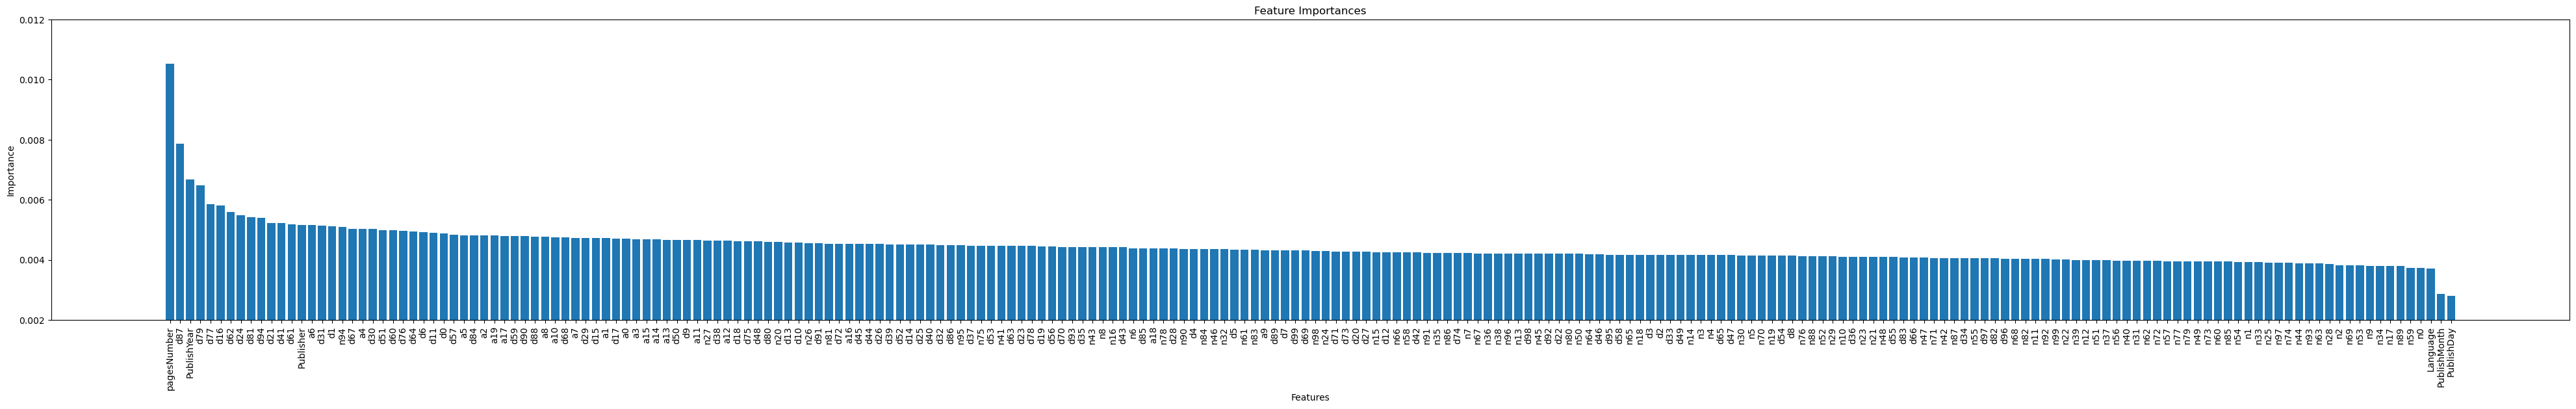

In [225]:
feature_importances = rf.feature_importances_

# Assuming you have trained a random forest model 'rf' and have a pandas DataFrame 'df'
feature_importances = rf.feature_importances_
feature_names = X_train.columns.tolist()

# Sort the feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = np.array(feature_names)[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(50, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances)
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.ylim(0.002, 0.012)
plt.show()

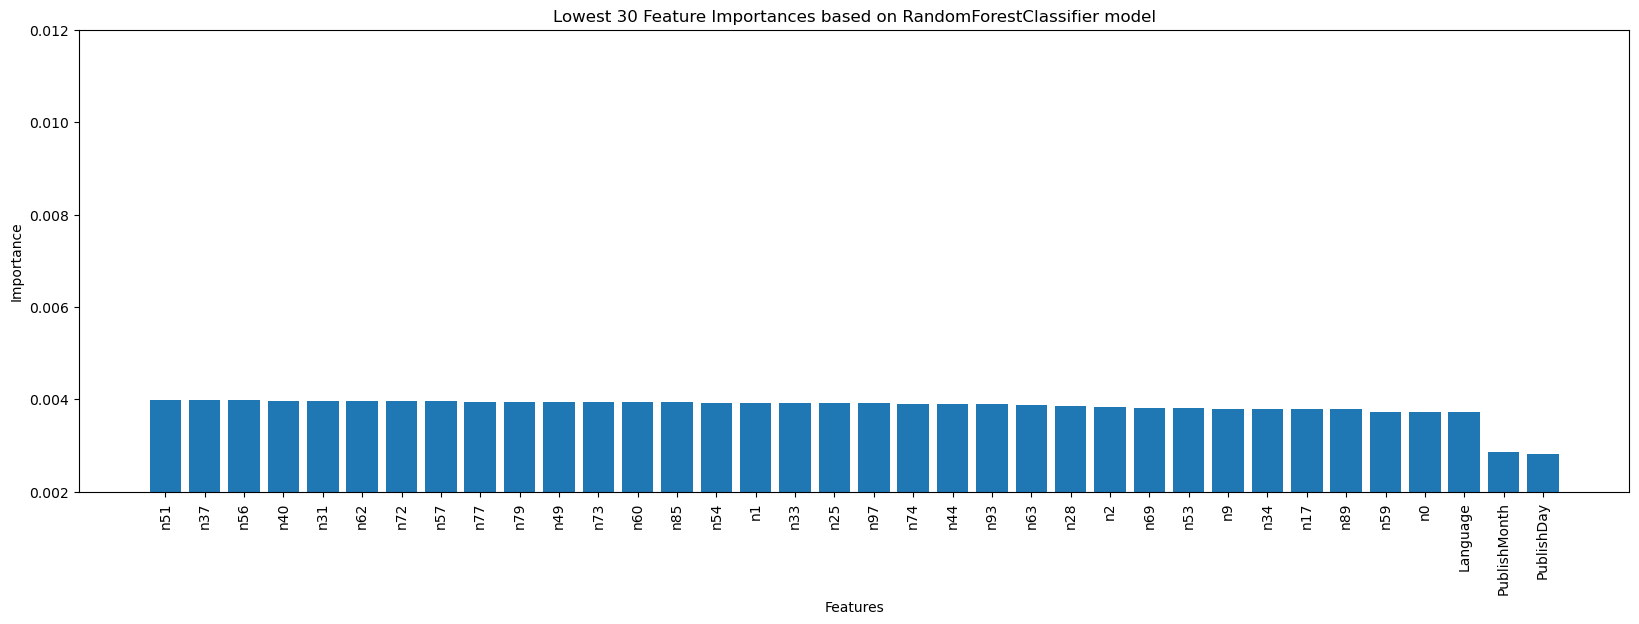

In [227]:
# Select only the top 20 features
top_feature_importances = sorted_feature_importances[190:]
top_feature_names = sorted_feature_names[190:]

# Plot the feature importances for the top 20 features
plt.figure(figsize=(20, 6))
plt.bar(range(len(top_feature_importances)), top_feature_importances)
plt.xticks(range(len(top_feature_importances)), top_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Lowest 30 Feature Importances based on RandomForestClassifier model')

plt.ylim(0.002, 0.012)
plt.show()